<a href="https://colab.research.google.com/github/CalCraven/plotting_in_python/blob/main/plot-IR-Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install_miniforge()

In [ ]:
import condacolab
condacolab.check()

!conda install mamba -y
!mamba install anaconda-client -n base -y

!git clone https://github.com/CalCraven/plotting_in_python.git
%cd plotting_in_python

!pip install .
%cd ..
!pip install --upgrade ipykernel -y

!mamba install -c conda-forge pandas plotly matplotlib numpy openpyxl jupyterlab scipy -y

In [7]:
# Load data

import pandas as pd

df = pd.read_excel('data/9-9-24 pDCPD-b-pNBDAC Modified.xlsx')
df

,Unnamed: 0,Regular,Unnamed: 2,Unnamed: 3,Unnamed: 4,Normalized,Unnamed: 6,Unnamed: 7,Unnamed: 8,Scaled 1,Unnamed: 10,Unnamed: 11,Unnamed: 12,Scaled 2,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,399.9158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.120000,0.170000,0.010000,0.080000,0.200000,0.300000
1,400.1569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.120000,0.170000,0.010000,0.080000,0.200000,0.300000
2,400.3979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.120000,0.170000,0.010000,0.080000,0.200000,0.300000
3,400.6390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.120000,0.170000,0.010000,0.080000,0.200000,0.300000
4,400.8800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.120000,0.170000,0.010000,0.080000,0.200000,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14931,3999.1580,-0.002477,-0.002126,-0.002262,-0.004668,-0.002477,-0.001003,-0.001111,-0.002222,-0.002477,0.048997,0.118889,0.167778,0.007523,0.078997,0.198889,0.297778
14932,3999.3990,-0.002475,-0.002129,-0.002264,-0.004674,-0.002475,-0.001005,-0.001112,-0.002225,-0.002475,0.048995,0.118888,0.167775,0.007525,0.078995,0.198888,0.297775
14933,3999.6400,-0.002479,-0.002135,-0.002270,-0.004688,-0.002479,-0.001008,-0.001115,-0.002231,-0.002479,0.048992,0.118885,0.167769,0.007521,0.078992,0.198885,0.297769
14934,3999.8810,-0.002488,-0.002145,-0.002279,-0.004709,-0.002488,-0.001012,-0.001119,-0.002241,-0.002488,0.048988,0.118881,0.167759,0.007512,0.078988,0.198881,0.297759


In [11]:
# rename and slice columns of data
df = df.rename(columns={
    "Unnamed: 0": "xaxis",
    "Regular": "Sample1",
    "Unnamed: 2": "Sample2",
    "Unnamed: 3": "Sample3",
    "Unnamed: 4": "Sample4"
})
df = df.loc[:, :"Sample4"]
df

,xaxis,Sample1,Sample2,Sample3,Sample4
0,399.9158,0.000000,0.000000,0.000000,0.000000
1,400.1569,0.000000,0.000000,0.000000,0.000000
2,400.3979,0.000000,0.000000,0.000000,0.000000
3,400.6390,0.000000,0.000000,0.000000,0.000000
4,400.8800,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
14931,3999.1580,-0.002477,-0.002126,-0.002262,-0.004668
14932,3999.3990,-0.002475,-0.002129,-0.002264,-0.004674
14933,3999.6400,-0.002479,-0.002135,-0.002270,-0.004688
14934,3999.8810,-0.002488,-0.002145,-0.002279,-0.004709


In [12]:
# normalize and offset data
cols_to_norm = ["Sample1", "Sample2", "Sample3", "Sample4"]
# normalize data by using lambda function
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
for i, col in enumerate(cols_to_norm): # iterate through each column and add i to offset data points
    df[col] = df[col].apply(lambda x: (x + i))

<Axes: xlabel='xaxis'>

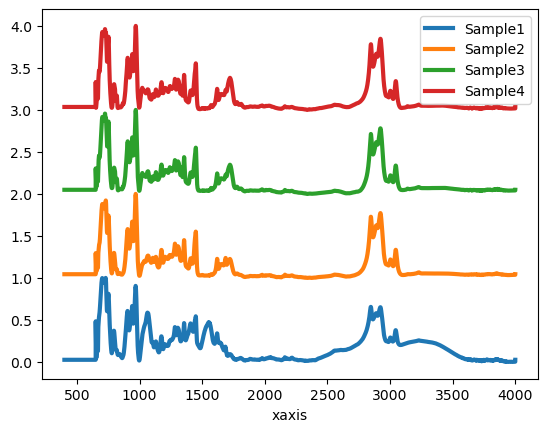

In [13]:
# plot IR
df.plot(x="xaxis", y=cols_to_norm, kind="line", lw=3)

In [56]:
# use a package function to identify peaks
import scipy

peak_info = scipy.signal.find_peaks(
    df["Sample1"],
    height=0.5, distance=100,
    width=5
)
peak_info[1].keys()

print(f"Number of peaks found is {len(peak_info[0])}\n")

Number of peaks found is 10



dict_keys(['peak_heights', 'prominences', 'left_bases', 'right_bases', 'widths', 'width_heights', 'left_ips', 'right_ips'])

/var/folders/wy/fsjbkz_s10b30c6mzcw0y4jc0000gn/T/ipykernel_81074/3588677344.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


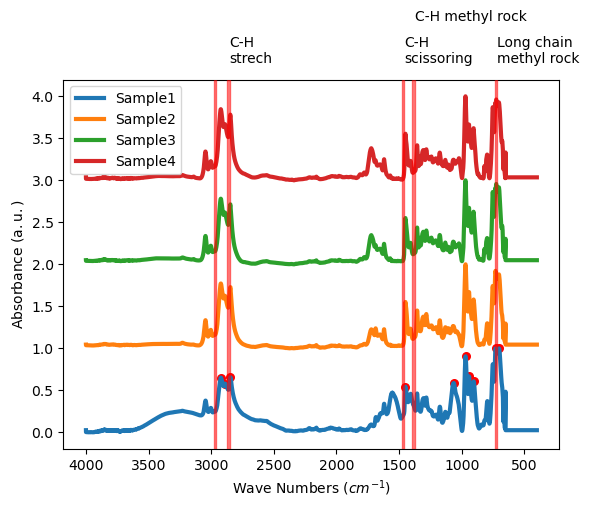

In [69]:
# Automatically mark peaks and highlight chosen IR regions

import matplotlib.pyplot as plt

IR_RegionsDict = {
    "C-H\nstrech":[2971, 2863],
    "C-H\nscissoring":[1470],
    "C-H methyl rock":[1383],
    "Long chain \nmethyl rock":[726]
}
# from https://courses.lumenlearning.com/suny-mcc-organicchemistry/chapter/infrared-spectra-of-some-common-functional-groups/
ax = df.plot(x="xaxis", y=cols_to_norm, kind="line", lw=3)
ax.invert_xaxis()

xdata = df["xaxis"]
for center, height in zip(peak_info[0], peak_info[1]["peak_heights"]):
    # use peaks to identify positions
    xcenter = xdata[center]
    # ax.axvspan(xcenter, x, color='red', alpha=0.5)
    ax.scatter(xcenter, height, c="r", s=30)

max_IR = df[cols_to_norm].max(axis=None)
vertical_label = [0,0, max_IR/8,0]
i=0
for key, values in IR_RegionsDict.items():
    for region in values:
        ax.axvspan(region-10, region+10, color='red', alpha=0.5,zorder=10)
    ax.text(region-10, max_IR*1.1+vertical_label[i], s=key, zorder=11)
    i = i+1

fig = plt.gcf()
ax.set_xlabel("Wave Numbers ($cm^{-1}$)")
ax.set_ylabel("Absorbance ($\mathrm{a.u.}$)")
fig.savefig("figures/IRDATA.pdf", dpi=200)
fig.show()


## Optional Exercises

#### Exercise 1 
try to split the plot into 2, one from 3700 to 2700 cm^-1 and the other from 1900-900 cm^-1

In [53]:
## CODE HERE ##


### <font color="red"><b>Hint</b></font>
<details>
  <summary>Click once to show hint!</summary>
    df1 = df.loc[(df["xaxis"] < 3700) & (df["xaxis"] > 2700)]
  
</details>

#### Exercise 2
try to rename the samples in the legend to ["Polymer 1", "Polymer 2", "Polymer 3", "Polymer 4"]

In [ ]:
## CODE HERE ##


### <font color="red"><b>Hint</b></font>
<details>
  <summary>Click once to show hint!</summary>
    https://stackoverflow.com/questions/23037548/change-main-plot-legend-label-text
  


</details>

#### Exercise 3
try to change the color labeling of each line on the plot

In [ ]:
## CODE HERE ##


### <font color="red"><b>Hint</b></font>
<details>
  <summary>Click once to show answer!</summary>
    
    import numpy as np
    from matplotlib import colormaps
    print(list(colormaps))
    cmap = colormaps["viridis"]
    # list_of_colors = cmap(np.linspace(0, 1, len(df.columns)))
    list_of_colors = ["red", "blue", "#5093ef", (0.1,0.5,0.6)] # manually set colors
    df.plot(x="xaxis", y=cols_to_norm, kind="line", lw=3, color=list_of_colors)
  


</details>

## More tutorials and resources
* [matplotlib tutorials](https://matplotlib.org/stable/tutorials/index.html)</br>
* [pandas tutorials](https://pandas.pydata.org/docs/getting_started/tutorials.html)
* [pandas plotting tutorials](https://realpython.com/pandas-plot-python/)
* [plotly interactive plots tutorials](https://programminghistorian.org/en/lessons/interactive-visualization-with-plotly)
* [3D plots](https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/)
* [heatmaps](https://python-graph-gallery.com/heatmap/)
